In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import pandas as pd
from functions.plotting_tools import set_layout
pd.options.mode.chained_assignment = None  # default='warn'
from functions.plotting_tools import save_figures

In [2]:
life= 'middle life'
runs=['run1','run2','run3']
proteins=['AR NR','AR CR','ER', 'GR NR', 'GR CR']
path = 'results/clustering_ncontacts'
path_figures = 'results/clustering_ncontacts'

In [68]:
life= 'middle life'
runs=['run1','run2','run3']
proteins=['AR NR','AR CR','ER', 'GR NR', 'GR CR']
path = 'results/clustering_ncontacts'
path_figures = 'results/clustering_ncontacts'
evolution = {}

for protein in proteins:
    for run in runs:
        key = (protein, run)
        file ='{}/{}/{}/{}/evol.csv'.format(path, protein, run, life) 
        evol_file = pd.read_csv(file, header=None)
        evol = round(np.mean(evol_file[0]), 3)
        evolution[key] = evol

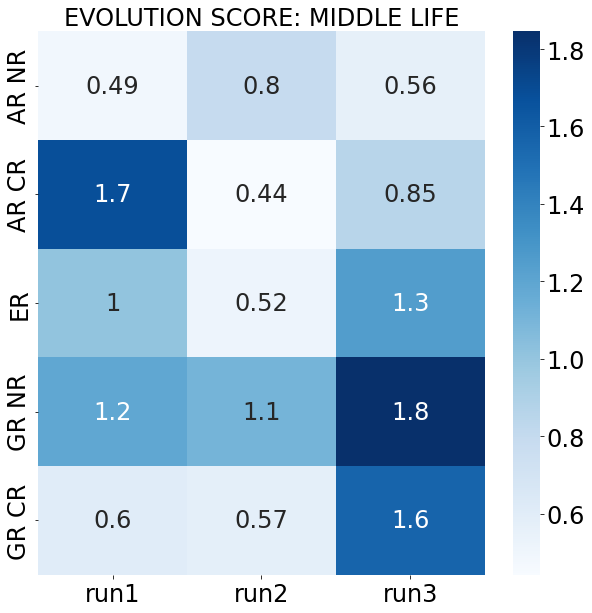

In [69]:
name_file = f'evol_score_{life}'
set_layout(24, 24, 20)
plot = plt.figure(figsize= (10, 10))
scores = np.fromiter(evolution.values(), dtype=float)
scores = np.reshape(scores, (len(proteins), len(runs)))
keys = np.array(list(evolution.keys()))

cmap='Blues'
plt.title(f'EVOLUTION SCORE: {life.upper()}')
ax = sns.heatmap(scores, cmap=cmap, xticklabels=runs, yticklabels=proteins, annot=True, 
                 vmin=np.nanmin(scores), vmax=np.nanmax(scores))
plt.yticks(np.arange(5)+0.5,va="center");

save_figures(plot,path_figures, name_file)